In [1]:
import pandas as pd
import numpy as np

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('cleaned_questions.csv')
df

,question,processed_question
0,1. What are the first types of policies I shou...,what are the first types of policies i should...
1,2. How much should I be insured for?,how much should i be insured for
2,3. What percentage of my savings should be set...,what percentage of my savings should be set a...
3,4. What common mistakes should I avoid when bu...,what common mistakes should i avoid when buyi...
4,5. How do I file an insurance claim and how lo...,how do i file an insurance claim and how long...
...,...,...
529,How do I submit feedback?,how do i submit feedback
530,When will I receive my renewal invitation?,when will i receive my renewal invitation
531,Can I make changes to my renewal details?,can i make changes to my renewal details
532,I received notification that my credit card d...,i received notification that my credit card d...


## Lemmatization

In [3]:
#lemmanisation
#using spacy
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.stem import WordNetLemmatizer

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df['lemmatised_question'] = df['processed_question'].apply(lambda x: lemmatizer(x))
df['lemmatised_question'] = df['lemmatised_question'] .str.replace('-PRON-', '')

## Tokenization

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokenize the words 
df['tokenized_question'] = df['lemmatised_question'].apply(lambda x: tokenizer.tokenize(x))

In [5]:
df

,question,processed_question,lemmatised_question,tokenized_question
0,1. What are the first types of policies I shou...,what are the first types of policies i should...,what be the first type of policy i should get,"[what, be, the, first, type, of, policy, i, sh..."
1,2. How much should I be insured for?,how much should i be insured for,how much should i be insure for,"[how, much, should, i, be, insure, for]"
2,3. What percentage of my savings should be set...,what percentage of my savings should be set a...,what percentage of saving should be set asi...,"[what, percentage, of, saving, should, be, set..."
3,4. What common mistakes should I avoid when bu...,what common mistakes should i avoid when buyi...,what common mistake should i avoid when buy ...,"[what, common, mistake, should, i, avoid, when..."
4,5. How do I file an insurance claim and how lo...,how do i file an insurance claim and how long...,how do i file an insurance claim and how lon...,"[how, do, i, file, an, insurance, claim, and, ..."
...,...,...,...,...
529,How do I submit feedback?,how do i submit feedback,how do i submit feedback,"[how, do, i, submit, feedback]"
530,When will I receive my renewal invitation?,when will i receive my renewal invitation,when will i receive renewal invitation,"[when, will, i, receive, renewal, invitation]"
531,Can I make changes to my renewal details?,can i make changes to my renewal details,can i make change to renewal detail,"[can, i, make, change, to, renewal, detail]"
532,I received notification that my credit card d...,i received notification that my credit card d...,i receive notification that credit card ded...,"[i, receive, notification, that, credit, card,..."


## Stop words removal

In [6]:
from nltk.corpus import words
from nltk.corpus import stopwords

#remove stop words
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    custom_words_rm = ['insurance', 'policy', 'plan', 'year']
    final_words = [w for w in words if w not in custom_words_rm]
    return final_words

words = words.words()

#remove words with length less than 3 & urls
def remove_shortwords(text, words):
    words = [w for w in text if len(w)>=3]
    return words

df['remove_stopwords_content'] = df['tokenized_question'].apply(lambda x: remove_stopwords(x))

## POS Tagging

In [7]:
import nltk
from nltk.tokenize import word_tokenize

def POS_tagging(str_list):
    removeitem = ['i','im',"nil",'la','cant','eg','get','make','cos','whereby','']
    tokens = nltk.pos_tag(str_list)
    JJ_tokens = [i[0] for i in tokens if i[1] in ['JJ','JJS','JJR'] and i[0] not in removeitem]
    noun_tokens = [i[0] for i in tokens if i[1] in ['NN','NNS','NNP','NNPS'] and i[0] not in removeitem]
    return (JJ_tokens + noun_tokens)

df['pos_tag_content']=df['remove_stopwords_content'].apply(lambda x: POS_tagging(x))

## Processed Final Content

In [8]:
def join(text):
    sentence = " ".join(text)
    return sentence
df['final_question'] = df['pos_tag_content'].apply(lambda x: join(x))

In [9]:
df

,question,processed_question,lemmatised_question,tokenized_question,remove_stopwords_content,pos_tag_content,final_question
0,1. What are the first types of policies I shou...,what are the first types of policies i should...,what be the first type of policy i should get,"[what, be, the, first, type, of, policy, i, sh...","[first, type, get]",[type],type
1,2. How much should I be insured for?,how much should i be insured for,how much should i be insure for,"[how, much, should, i, be, insure, for]","[much, insure]","[much, insure]",much insure
2,3. What percentage of my savings should be set...,what percentage of my savings should be set a...,what percentage of saving should be set asi...,"[what, percentage, of, saving, should, be, set...","[percentage, saving, set, aside]",[percentage],percentage
3,4. What common mistakes should I avoid when bu...,what common mistakes should i avoid when buyi...,what common mistake should i avoid when buy ...,"[what, common, mistake, should, i, avoid, when...","[common, mistake, avoid, buy, first]","[common, mistake, avoid, buy]",common mistake avoid buy
4,5. How do I file an insurance claim and how lo...,how do i file an insurance claim and how long...,how do i file an insurance claim and how lon...,"[how, do, i, file, an, insurance, claim, and, ...","[file, claim, long, take]","[file, claim]",file claim
...,...,...,...,...,...,...,...
529,How do I submit feedback?,how do i submit feedback,how do i submit feedback,"[how, do, i, submit, feedback]","[submit, feedback]","[submit, feedback]",submit feedback
530,When will I receive my renewal invitation?,when will i receive my renewal invitation,when will i receive renewal invitation,"[when, will, i, receive, renewal, invitation]","[receive, renewal, invitation]","[receive, renewal, invitation]",receive renewal invitation
531,Can I make changes to my renewal details?,can i make changes to my renewal details,can i make change to renewal detail,"[can, i, make, change, to, renewal, detail]","[make, change, renewal, detail]","[change, renewal, detail]",change renewal detail
532,I received notification that my credit card d...,i received notification that my credit card d...,i receive notification that credit card ded...,"[i, receive, notification, that, credit, card,...","[receive, notification, credit, card, deductio...","[receive, fail, notification, credit, card, de...",receive fail notification credit card deductio...


# Wordcloud

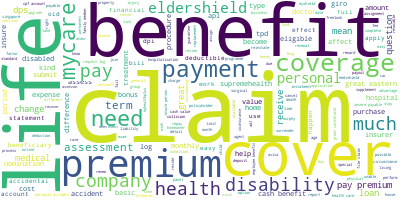

In [10]:
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['final_question'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Count Vectorizer

In [11]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


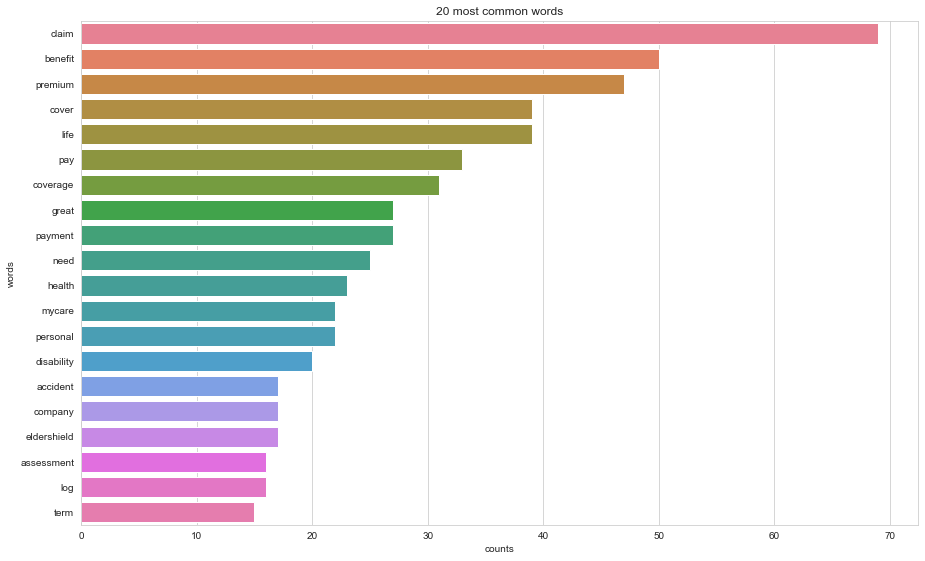

In [12]:
# Initialise the count vectorizer with the English stop words
question_count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

# Fit and transform the processed titles
question_count_data = question_count_vectorizer.fit_transform(df['final_question'])

# Visualise the 20 most common words
plot_20_most_common_words(question_count_data, question_count_vectorizer)

## LDA Model

In [17]:
# import warnings
# warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 3
number_words = 10

In [18]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(question_count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, question_count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
need log medical health loan claim doctor eastern great giro

Topic #1:
benefit life claim great coverage company receive cash supremehealth value

Topic #2:
premium cover pay claim mycare personal eldershield accident disability payment


Topic 0: Medical Insurance Coverage

Topic 1: Life Insurance  

Topic 2: Disability Accident Insurance